<a href="https://colab.research.google.com/github/mssamoilenko/AnlDataPract/blob/main/2labAnlData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практична робота №2
# Тема: Регресійний аналіз.
# Мета: дослідження методів регресійного аналізу та побудова моделей лінійної, квадратичної й кубічної регресії для виявлення залежностей між змінними з використанням бібліотек Pandas, NumPy, Matplotlib і scikit-learn.
# Варіант №2
# Хід роботи
1. Збір данних відповідно мого варіанта це мають бути: Пасажирські авіаперевезення, а саме дальність і вартість перельоту між різними містами економ-класом. Я знайшла придатні до цього завдання данні на сайті Kaggle, ось посилання на датасет https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?select=economy.csv. Далі я займуся підготовкою цих данних до аналізу.



In [35]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("economy.csv", header = 0)
df

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"
...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697"
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709"
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"


Щоб спростити аналіз я візьму лише підмножину даних.

In [14]:
data_sample = df.sample(300, random_state=42)
data_sample

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
81260,12-03-2022,Indigo,6E,219,14:20,Mumbai,04h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:15,Chennai,"3,543"
36726,22-02-2022,Vistara,UK,953,20:40,Delhi,15h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,11:50,Chennai,"11,520"
135553,31-03-2022,Air India,AI,768,15:30,Kolkata,05h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:15,Mumbai,"5,523"
50358,20-03-2022,Indigo,6E,5017,10:05,Mumbai,02h 10m,non-stop,12:15,Delhi,"2,738"
162314,10-03-2022,Vistara,UK,898,07:40,Hyderabad,13h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"3,471"
...,...,...,...,...,...,...,...,...,...,...,...
149839,03-03-2022,Indigo,6E,893,09:05,Kolkata,06h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,15:05,Chennai,"4,796"
84344,13-02-2022,SpiceJet,SG,4009,06:50,Bangalore,25h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,08:45,Delhi,"7,488"
119794,11-02-2022,Vistara,UK,776,17:35,Kolkata,28h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:55,Delhi,"15,414"
112970,11-03-2022,Vistara,UK,850,19:55,Bangalore,11h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,07:50,Hyderabad,"5,322"


In [15]:
data = data_sample[['airline', 'dep_time', 'from', 'time_taken', 'stop', 'to', 'price']].copy() #видаляю зайві стовпці

# Ціни в індійських рупіях (INR)
data['price'] = data['price'].str.replace(',', '').astype(float)  #очищаю ціну від ком

def convert_time_to_hours(x): #перетворюю текстову тривалість польоту у числовий формат
    h, m = 0, 0
    if 'h' in x:
        h = int(x.split('h')[0])
        x = x.split('h')[1]
    if 'm' in x:
        m = int(x.split('m')[0].strip())
    return h + m/60

data['duration_hours'] = data['time_taken'].apply(convert_time_to_hours)

# видаляю старий стовпець
data = data.drop(columns=['time_taken'])

data.head()

,airline,dep_time,from,stop,to,price,duration_hours
81260,Indigo,14:20,Mumbai,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Chennai,3543.0,4.916667
36726,Vistara,20:40,Delhi,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Chennai,11520.0,15.166667
135553,Air India,15:30,Kolkata,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,5523.0,5.750000
50358,Indigo,10:05,Mumbai,non-stop,Delhi,2738.0,2.166667
162314,Vistara,07:40,Hyderabad,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,3471.0,13.083333


In [19]:
data['stop'].unique()  #очищую дані про зупинки

array(['1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t',
       'non-stop ', '2+-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Delhi\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JGB\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t'],
      dtype=object)

In [20]:
def clean_stops(x):
    x = str(x).lower().strip()
    x = re.sub(r'\s+', ' ', x)  # прибирає зайві пробіли і \n\t
    if 'non' in x:
        return 0
    elif '1' in x:
        return 1
    elif '2' in x:
        return 2
    elif '3' in x:
        return 3
    else:
        return None

data['n_stops'] = data['stop'].apply(clean_stops)
data = data.drop(columns=['stop'])
data.head()

,airline,dep_time,from,to,price,duration_hours,n_stops
81260,Indigo,14:20,Mumbai,Chennai,3543.0,4.916667,1
36726,Vistara,20:40,Delhi,Chennai,11520.0,15.166667,1
135553,Air India,15:30,Kolkata,Mumbai,5523.0,5.750000,1
50358,Indigo,10:05,Mumbai,Delhi,2738.0,2.166667,0
162314,Vistara,07:40,Hyderabad,Mumbai,3471.0,13.083333,1


Додаю стовпчик з інформацією про дальність польоту. Використано дані з Вікіпедії та сайтів авіакомпаній. Відстань в кілометрах приблизна.

In [21]:
data['from'].unique()

array(['Mumbai', 'Delhi', 'Kolkata', 'Hyderabad', 'Bangalore', 'Chennai'],
      dtype=object)

In [22]:
data['to'].unique()

array(['Chennai', 'Mumbai', 'Delhi', 'Hyderabad', 'Bangalore', 'Kolkata'],
      dtype=object)

In [23]:
distances_km = {
    ('Delhi', 'Mumbai'): 1150,
    ('Delhi', 'Chennai'): 1750,
    ('Delhi', 'Kolkata'): 1300,
    ('Delhi', 'Hyderabad'): 1250,
    ('Delhi', 'Bangalore'): 1750,
    ('Mumbai', 'Chennai'): 1030,
    ('Mumbai', 'Kolkata'): 1650,
    ('Mumbai', 'Hyderabad'): 620,
    ('Mumbai', 'Bangalore'): 840,
    ('Chennai', 'Kolkata'): 1380,
    ('Chennai', 'Hyderabad'): 520,
    ('Chennai', 'Bangalore'): 290,
    ('Kolkata', 'Hyderabad'): 1150,
    ('Kolkata', 'Bangalore'): 1550,
    ('Hyderabad', 'Bangalore'): 500,
}

In [25]:
def get_distance(row):
    key = (row['from'], row['to'])
    rev_key = (row['to'], row['from'])
    if key in distances_km:
        return distances_km[key]
    elif rev_key in distances_km:
        return distances_km[rev_key]
    else:
        return None  # якщо раптом не знайдеться пара

data['distance_km'] = data.apply(get_distance, axis=1)
data.head()

,airline,dep_time,from,to,price,duration_hours,n_stops,distance_km
81260,Indigo,14:20,Mumbai,Chennai,3543.0,4.916667,1,1030
36726,Vistara,20:40,Delhi,Chennai,11520.0,15.166667,1,1750
135553,Air India,15:30,Kolkata,Mumbai,5523.0,5.750000,1,1650
50358,Indigo,10:05,Mumbai,Delhi,2738.0,2.166667,0,1150
162314,Vistara,07:40,Hyderabad,Mumbai,3471.0,13.083333,1,620


Підготовка категоріальних ознак.

In [31]:
le = LabelEncoder()
data['airline'] = le.fit_transform(data['airline'])
data['from'] = le.fit_transform(data['from'])
data['to'] = le.fit_transform(data['to'])

2. Розбиваю вибірку на тренувальну та валідаційну. Відповідно варіанту 75/25.  

In [32]:
X = data[['airline', 'duration_hours', 'n_stops', 'distance_km']]
y = data['price']

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.25, random_state=42
)

3. Навчаю лінійну регресію на тренувальній та оцінюю на валідаційній
вибірці.

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

In [34]:
results = pd.DataFrame({'Real Price': y_valid.values, 'Predicted Price': y_pred})
results.head(10)

,Real Price,Predicted Price
0,10744.0,7946.995108
1,11940.0,9093.387674
2,6277.0,7474.349340
3,10979.0,7346.398093
4,4721.0,5185.825775
5,5206.0,6960.704731
6,2276.0,6915.190276
7,4969.0,8635.405862
8,5402.0,5916.175049
9,6319.0,6359.348017


In [36]:
mae = mean_absolute_error(y_valid, y_pred)
mse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.3f}")

MAE: 2520.39
MSE: 11043566.40
R²: 0.196


R² = 0.196 показує низьку якість моделі - лише 19.6% змін ціни пояснюються обраними ознаками. MAE = 2520.39 означає, що в середньому модель помиляється на 2520 рупій у прогнозі ціни квитка, а високе MSE = 11,043,566.40 свідчить про значні похибки в окремих прогнозах.

Основні причини слабких результатів:

*   Недостатня кількість релевантних ознак
*   Нелінійний характер залежності між ціною та факторами
*   Відсутність обробки викидів у даних
*   Складність точно прогнозувати ціни авіаквитків через багато факторів, що впливають

4. Проводжу крос-валідацію за кількістю блоків відповідно до варіанта 2, а саме на 3 блоки.

In [38]:
# Використовую всю вибірку (X, y) для крос-валідації
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Список для зберігання MAE для кожного блоку
mae_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
    X_train_cv, X_val_cv = X.iloc[train_index], X.iloc[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

    model_cv = LinearRegression()
    model_cv.fit(X_train_cv, y_train_cv)

    # Прогноз та оцінка
    y_pred_cv = model_cv.predict(X_val_cv)
    mae = mean_absolute_error(y_val_cv, y_pred_cv)
    mae_scores.append(mae)

    print(f"Блок {fold}: MAE = {mae:.2f}")

# Середній MAE по всіх блоках
mean_mae = np.mean(mae_scores)
print(f"\nСередній MAE при крос-валідації: {mean_mae:.2f}")
print(f"MAE по кожному блоку: {[f'{score:.2f}' for score in mae_scores]}")

# Порівняння з попередніми результатами
print(f"\nПорівняння з результатами без крос-валідації:")
print(f"MAE при звичайному розбитті 75/25: {mae:.2f}")
print(f"MAE при крос-валідації (3 блоки): {mean_mae:.2f}")

Блок 1: MAE = 2478.46
Блок 2: MAE = 2721.73
Блок 3: MAE = 3283.43

Середній MAE при крос-валідації: 2827.87
MAE по кожному блоку: ['2478.46', '2721.73', '3283.43']

Порівняння з результатами без крос-валідації:
MAE при звичайному розбитті 75/25: 3283.43
MAE при крос-валідації (3 блоки): 2827.87


Проведена крос-валідація з 3 блоками підтвердила стабільність моделі. Середній MAE = 2827.87 рупій демонструє, що модель послідовно помиляється на ≈2800 рупій незалежно від розбиття даних. Різниця між найкращим (2478.46) та найгіршим (3283.43) результатом по блоках становить 805 рупій, що свідчить про помірну стабільність прогнозів на різних підвибірках даних.

5. Створюю квадратичні та кубічні ознаки.

In [39]:
# Використовую тільки числові ознаки для поліноміальних перетворень
numerical_features = ['duration_hours', 'n_stops', 'distance_km']
X_numerical = X[numerical_features]

print("Початкові ознаки:", numerical_features)
print("Розмірність початкових даних:", X_numerical.shape)

# Створюю квадратичні ознаки
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly2 = poly2.fit_transform(X_numerical)

print(f"\nКвадратичні ознаки (degree=2):")
print(f"Розмірність після перетворення: {X_poly2.shape}")
print(f"Кількість нових ознак: {X_poly2.shape[1]}")
print("Назви квадратичних ознак:", poly2.get_feature_names_out(numerical_features))

# Створюю кубічні ознаки
poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly3 = poly3.fit_transform(X_numerical)

print(f"\nКубічні ознаки (degree=3):")
print(f"Розмірність після перетворення: {X_poly3.shape}")
print(f"Кількість нових ознак: {X_poly3.shape[1]}")
print("Назви кубічних ознак:", poly3.get_feature_names_out(numerical_features))

print(f"\nДемонстрація перетворень (перші 3 записи):")
print("Початкові дані:")
print(X_numerical.head(3))
print("\nКвадратичні ознаки (перші 3 записи):")
print(X_poly2[:3])
print("\nКубічні ознаки (перші 3 записи):")
print(X_poly3[:3])

# Додаю категоріальні ознаки назад до поліноміальних
X_combined_poly2 = np.column_stack([X['airline'].values, X_poly2])
X_combined_poly3 = np.column_stack([X['airline'].values, X_poly3])

print(f"\nФінальні розмірності датасетів:")
print(f"Квадратичні ознаки + airline: {X_combined_poly2.shape}")
print(f"Кубічні ознаки + airline: {X_combined_poly3.shape}")

Початкові ознаки: ['duration_hours', 'n_stops', 'distance_km']
Розмірність початкових даних: (300, 3)

Квадратичні ознаки (degree=2):
Розмірність після перетворення: (300, 9)
Кількість нових ознак: 9
Назви квадратичних ознак: ['duration_hours' 'n_stops' 'distance_km' 'duration_hours^2'
 'duration_hours n_stops' 'duration_hours distance_km' 'n_stops^2'
 'n_stops distance_km' 'distance_km^2']

Кубічні ознаки (degree=3):
Розмірність після перетворення: (300, 19)
Кількість нових ознак: 19
Назви кубічних ознак: ['duration_hours' 'n_stops' 'distance_km' 'duration_hours^2'
 'duration_hours n_stops' 'duration_hours distance_km' 'n_stops^2'
 'n_stops distance_km' 'distance_km^2' 'duration_hours^3'
 'duration_hours^2 n_stops' 'duration_hours^2 distance_km'
 'duration_hours n_stops^2' 'duration_hours n_stops distance_km'
 'duration_hours distance_km^2' 'n_stops^3' 'n_stops^2 distance_km'
 'n_stops distance_km^2' 'distance_km^3']

Демонстрація перетворень (перші 3 записи):
Початкові дані:
        

6. Розраховую оцінку на валідаційній вибірці та із використанням крос
валідації для кожного типу регресії.  

In [40]:
# Підготовка даних для різних типів ознак
X_linear = X.values  # Лінійні ознаки
X_quadratic = X_combined_poly2  # Квадратичні ознаки
X_cubic = X_combined_poly3      # Кубічні ознаки

datasets = {
    'Лінійна': X_linear,
    'Квадратична': X_quadratic,
    'Кубічна': X_cubic
}

results = []

# Тестування кожної моделі
for model_name, X_data in datasets.items():
    print(f"\n{model_name} регресія:")
    print("-" * 30)

    # Розбиття на тренувальну та валідаційну вибірки (75/25)
    X_train, X_val, y_train, y_val = train_test_split(
        X_data, y, test_size=0.25, random_state=42
    )

    # Навчання моделі
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Прогноз на валідаційній вибірці
    y_pred = model.predict(X_val)

    # Обчислення метрик для валідації
    mae_val = mean_absolute_error(y_val, y_pred)
    mse_val = mean_squared_error(y_val, y_pred)
    r2_val = r2_score(y_val, y_pred)

    # Крос-валідація з 3 блоками
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    mae_scores = []

    for train_index, val_index in kf.split(X_data):
        X_train_cv, X_val_cv = X_data[train_index], X_data[val_index]
        y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

        model_cv = LinearRegression()
        model_cv.fit(X_train_cv, y_train_cv)
        y_pred_cv = model_cv.predict(X_val_cv)
        mae_cv = mean_absolute_error(y_val_cv, y_pred_cv)
        mae_scores.append(mae_cv)

    mae_cv_mean = np.mean(mae_scores)

    # Зберігаємо результати
    results.append({
        'Тип регресії': model_name,
        'MAE (валідація)': round(mae_val, 2),
        'MSE (валідація)': round(mse_val, 2),
        'R² (валідація)': round(r2_val, 3),
        'MAE (крос-валідація)': round(mae_cv_mean, 2),
        'Кількість ознак': X_data.shape[1]
    })

    print(f"MAE валідація: {mae_val:.2f}")
    print(f"MAE крос-валідація: {mae_cv_mean:.2f}")
    print(f"R²: {r2_val:.3f}")
    print(f"Кількість ознак: {X_data.shape[1]}")

# Створюємо таблицю результатів
results_df = pd.DataFrame(results)
print("\n" + "=" * 80)
print("ТАБЛИЦЯ РЕЗУЛЬТАТІВ ПОРІВНЯННЯ МОДЕЛЕЙ")
print("=" * 80)
print(results_df.to_string(index=False))

# Визначаємо найкращу модель за крос-валідацією
best_model_cv = results_df.loc[results_df['MAE (крос-валідація)'].idxmin()]
print(f"\n🎯 НАЙКРАЩА МОДЕЛЬ (за крос-валідацією):")
print(f"   {best_model_cv['Тип регресії']} регресія")
print(f"   MAE крос-валідація: {best_model_cv['MAE (крос-валідація)']}")
print(f"   Кількість ознак: {best_model_cv['Кількість ознак']}")

# Визначаємо найкращу модель за валідацією
best_model_val = results_df.loc[results_df['MAE (валідація)'].idxmin()]
print(f"\n🏆 НАЙКРАЩА МОДЕЛЬ (за валідацією):")
print(f"   {best_model_val['Тип регресії']} регресія")
print(f"   MAE валідація: {best_model_val['MAE (валідація)']}")

# Аналіз результатів
print(f"\n📊 АНАЛІЗ РЕЗУЛЬТАТІВ:")
print(f"• Поліпшення MAE порівняно з лінійною моделлю:")
linear_mae = results_df[results_df['Тип регресії'] == 'Лінійна']['MAE (крос-валідація)'].values[0]
for _, row in results_df.iterrows():
    improvement = linear_mae - row['MAE (крос-валідація)']
    if improvement > 0:
        print(f"  {row['Тип регресії']}: +{improvement:.2f} рупій")
    else:
        print(f"  {row['Тип регресії']}: {improvement:.2f} рупій")


Лінійна регресія:
------------------------------
MAE валідація: 2520.39
MAE крос-валідація: 2827.87
R²: 0.196
Кількість ознак: 4

Квадратична регресія:
------------------------------
MAE валідація: 2493.02
MAE крос-валідація: 2843.49
R²: 0.215
Кількість ознак: 10

Кубічна регресія:
------------------------------
MAE валідація: 2482.59
MAE крос-валідація: 2812.89
R²: 0.220
Кількість ознак: 20

ТАБЛИЦЯ РЕЗУЛЬТАТІВ ПОРІВНЯННЯ МОДЕЛЕЙ
Тип регресії  MAE (валідація)  MSE (валідація)  R² (валідація)  MAE (крос-валідація)  Кількість ознак
     Лінійна          2520.39      11043566.40           0.196               2827.87                4
 Квадратична          2493.02      10793265.10           0.215               2843.49               10
     Кубічна          2482.59      10716007.52           0.220               2812.89               20

🎯 НАЙКРАЩА МОДЕЛЬ (за крос-валідацією):
   Кубічна регресія
   MAE крос-валідація: 2812.89
   Кількість ознак: 20

🏆 НАЙКРАЩА МОДЕЛЬ (за валідацією):
   Ку

Кубічна регресія показала найкращі результати з MAE 2482.59 рупій на валідації та 2812.89 рупій на крос-валідації. Поліноміальні моделі дещо покращили якість прогнозу (R² зріс з 0.196 до 0.220), проте поліпшення незначне - лише на 15-28 рупій порівняно з лінійною моделлю. Це свідчить, що додавання складних ознак не дало суттєвого ефекту, і основні фактори ціноутворення залишаються неврахованими.

7. Виписую функцію для кожного типу регресії (із коефіцієнтами та
константою).

In [41]:
# Навчаю фінальні моделі на всіх даних
models_final = {}

for model_name, X_data in datasets.items():
    print(f"\n{model_name.upper()} РЕГРЕСІЯ:")
    print("-" * 40)

    model_final = LinearRegression()
    model_final.fit(X_data, y)

    # Отримую коефіцієнти
    coefficients = model_final.coef_
    intercept = model_final.intercept_

    # Зберігаю модель
    models_final[model_name] = model_final

    # Виводжу функцію
    print(f"Функція {model_name.lower()} регресії:")
    print(f"price = {intercept:.2f}")

    for i, coef in enumerate(coefficients):
        if model_name == 'Лінійна':
            feature_names = ['airline', 'duration_hours', 'n_stops', 'distance_km']
            print(f" + ({coef:.4f}) × {feature_names[i]}")
        elif model_name == 'Квадратична':
            feature_names = ['airline'] + list(poly2.get_feature_names_out(numerical_features))
            print(f" + ({coef:.4f}) × {feature_names[i]}")
        else:  # Кубічна
            feature_names = ['airline'] + list(poly3.get_feature_names_out(numerical_features))
            print(f" + ({coef:.4f}) × {feature_names[i]}")

    # Спрощена форма для демонстрації
    print(f"\nСпрощена форма:")
    if model_name == 'Лінійна':
        print(f"price ≈ {intercept:.0f} + {coefficients[0]:.2f}×airline + {coefficients[1]:.2f}×duration + {coefficients[2]:.2f}×stops + {coefficients[3]:.2f}×distance")
    elif model_name == 'Квадратична':
        print(f"price ≈ {intercept:.0f} + ... [9 квадратичних членів]")
    else:
        print(f"price ≈ {intercept:.0f} + ... [19 кубічних членів]")

# Демонстрація прогнозу для прикладу
print("\n" + "=" * 50)
print("ПРИКЛАД ПРОГНОЗУ ЦІНИ")
print("=" * 50)

# Беру перший запис з даних
example_index = 0
print("Приклад даних для прогнозу:")
print(f"Airline: {X.iloc[example_index]['airline']}")
print(f"Duration: {X.iloc[example_index]['duration_hours']:.2f} год")
print(f"Stops: {X.iloc[example_index]['n_stops']}")
print(f"Distance: {X.iloc[example_index]['distance_km']} км")
print(f"Реальна ціна: {y.iloc[example_index]:.2f} рупій")

print("\nПрогноз різними моделями:")
for model_name, model in models_final.items():
    X_example = datasets[model_name][example_index].reshape(1, -1)
    prediction = model.predict(X_example)[0]
    print(f"{model_name}: {prediction:.2f} рупій (похибка: {abs(prediction - y.iloc[example_index]):.2f})")

# Аналіз важливості ознак для лінійної моделі
print("\n" + "=" * 50)
print("АНАЛІЗ ВАЖЛИВОСТІ ОЗНАК (Лінійна модель)")
print("=" * 50)

linear_model = models_final['Лінійна']
feature_names = ['airline', 'duration_hours', 'n_stops', 'distance_km']

print("Коефіцієнти лінійної моделі:")
for i, (name, coef) in enumerate(zip(feature_names, linear_model.coef_)):
    importance = abs(coef) / sum(abs(linear_model.coef_)) * 100
    print(f"{name}: {coef:.4f} ({importance:.1f}% важливості)")

print(f"\nКонстанта (intercept): {linear_model.intercept_:.2f}")


ЛІНІЙНА РЕГРЕСІЯ:
----------------------------------------
Функція лінійна регресії:
price = 2142.30
 + (305.5058) × airline
 + (165.7036) × duration_hours
 + (931.3790) × n_stops
 + (0.8650) × distance_km

Спрощена форма:
price ≈ 2142 + 305.51×airline + 165.70×duration + 931.38×stops + 0.86×distance

КВАДРАТИЧНА РЕГРЕСІЯ:
----------------------------------------
Функція квадратична регресії:
price = -3348.18
 + (357.1031) × airline
 + (46.0543) × duration_hours
 + (5209.7651) × n_stops
 + (8.8569) × distance_km
 + (-8.6326) × duration_hours^2
 + (198.9080) × duration_hours n_stops
 + (0.1456) × duration_hours distance_km
 + (-1273.7511) × n_stops^2
 + (-3.2302) × n_stops distance_km
 + (-0.0029) × distance_km^2

Спрощена форма:
price ≈ -3348 + ... [9 квадратичних членів]

КУБІЧНА РЕГРЕСІЯ:
----------------------------------------
Функція кубічна регресії:
price = -4175.48
 + (324.4856) × airline
 + (-185.6675) × duration_hours
 + (-8882.5790) × n_stops
 + (18.6265) × distance_km
 + (

8. Візуалізація початкових даних та 3 кривих регресії на одному графіку.

ВІЗУАЛІЗАЦІЯ ДАНИХ ТА РЕГРЕСІЙНИХ КРИВИХ
Параметри для побудови кривих:
Авіакомпанія: 5
Тривалість: 11.7 год
Зупинки: 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist

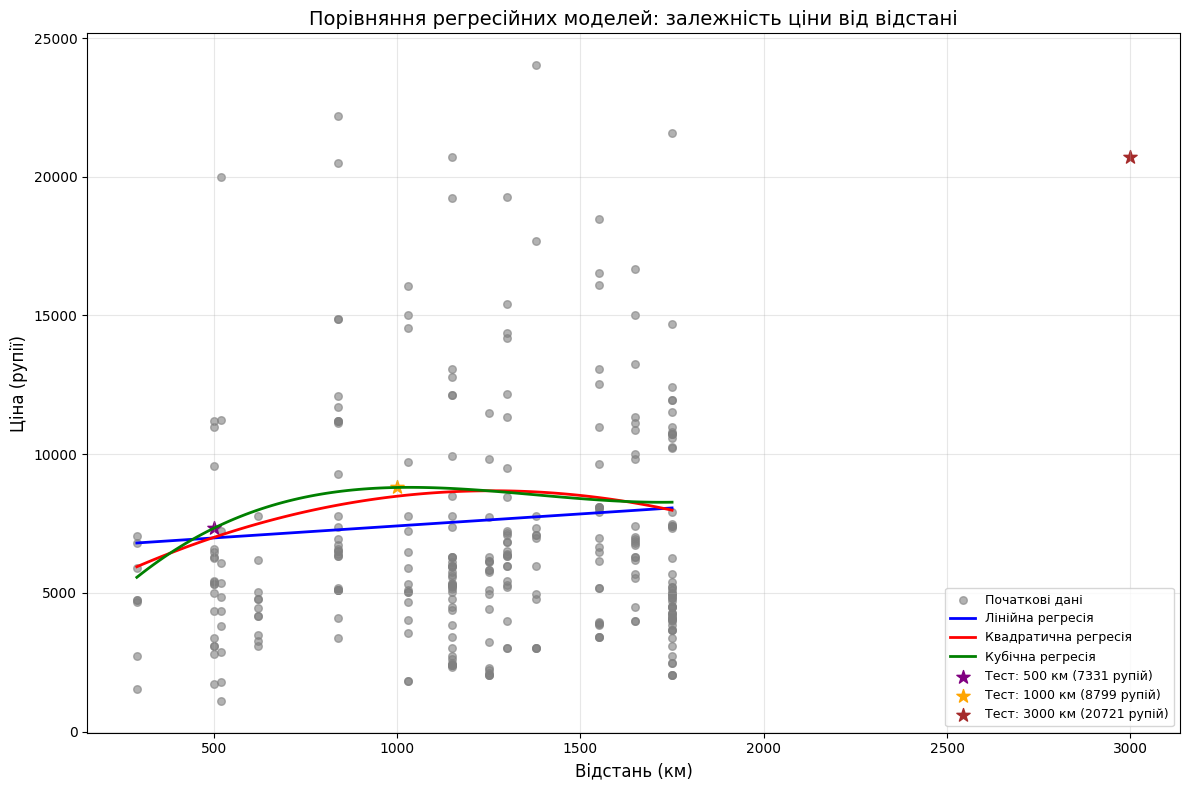

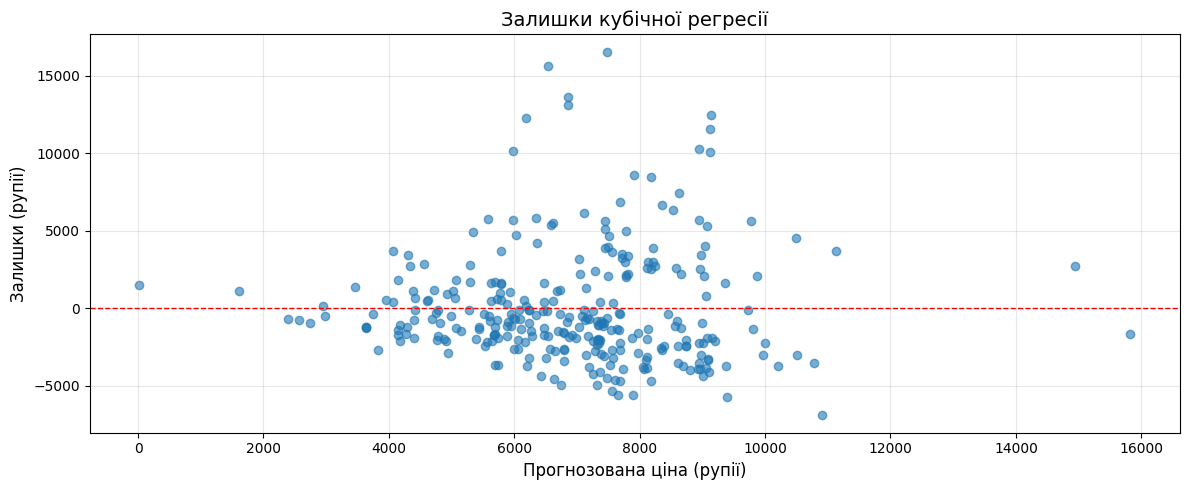


Аналіз графіків:
• Точки - реальні дані про ціни квитків
• Лінії - прогнози регресійних моделей
• Зірки - тестові прогнози для 500, 1000, 3000 км
• Другий графік показує залишки (різницю між реальними та прогнозованими значеннями)


In [42]:
# Створюю сітку значень для відстані (для гладких кривих)
distance_range = np.linspace(data['distance_km'].min(), data['distance_km'].max(), 100)

# Фіксовані середні значення інших параметрів для побудови кривих
avg_airline = X['airline'].mode()[0]  # найпоширеніша авіакомпанія
avg_duration = X['duration_hours'].mean()
avg_stops = X['n_stops'].mode()[0]  # найпоширеніша кількість зупинок

print("Параметри для побудови кривих:")
print(f"Авіакомпанія: {avg_airline}")
print(f"Тривалість: {avg_duration:.1f} год")
print(f"Зупинки: {avg_stops}")

# Створюю графік
plt.figure(figsize=(12, 8))

# 1. Початкові дані
plt.scatter(data['distance_km'], data['price'], alpha=0.6, color='gray', label='Початкові дані', s=30)

# 2. Лінійна регресія
linear_predictions = []
for dist in distance_range:
    features = np.array([[avg_airline, avg_duration, avg_stops, dist]])
    pred = models_final['Лінійна'].predict(features)[0]
    linear_predictions.append(pred)

plt.plot(distance_range, linear_predictions, 'b-', linewidth=2, label='Лінійна регресія')

# 3. Квадратична регресія
quadratic_predictions = []
for dist in distance_range:
    # Створюю числові ознаки
    num_features = np.array([[avg_duration, avg_stops, dist]])
    # Перетворюю в квадратичні
    num_poly2 = poly2.transform(num_features)
    # Додаю авіакомпанію
    features = np.column_stack([[avg_airline], num_poly2])
    pred = models_final['Квадратична'].predict(features)[0]
    quadratic_predictions.append(pred)

plt.plot(distance_range, quadratic_predictions, 'r-', linewidth=2, label='Квадратична регресія')

# 4. Кубічна регресія
cubic_predictions = []
for dist in distance_range:
    # Створюю числові ознаки
    num_features = np.array([[avg_duration, avg_stops, dist]])
    # Перетворюю в кубічні
    num_poly3 = poly3.transform(num_features)
    # Додаю авіакомпанію
    features = np.column_stack([[avg_airline], num_poly3])
    pred = models_final['Кубічна'].predict(features)[0]
    cubic_predictions.append(pred)

plt.plot(distance_range, cubic_predictions, 'g-', linewidth=2, label='Кубічна регресія')

# Налаштування графіка
plt.xlabel('Відстань (км)', fontsize=12)
plt.ylabel('Ціна (рупії)', fontsize=12)
plt.title('Порівняння регресійних моделей: залежність ціни від відстані', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Додаю тестові точки (500, 1000, 3000 км)
test_distances = [500, 1000, 3000]
colors = ['purple', 'orange', 'brown']

for i, dist in enumerate(test_distances):
    # Використовую кубічну модель (найкраща)
    num_features = np.array([[avg_duration, avg_stops, dist]])
    num_poly3 = poly3.transform(num_features)
    features = np.column_stack([[avg_airline], num_poly3])
    price_pred = models_final['Кубічна'].predict(features)[0]

    plt.scatter(dist, price_pred, color=colors[i], s=100, marker='*',
               label=f'Тест: {dist} км ({price_pred:.0f} рупій)')

plt.legend(fontsize=9)
plt.tight_layout()
plt.show()

# Додатковий графік: залишки
plt.figure(figsize=(12, 5))

# Залишки для кубічної моделі (найкращої)
X_cubic_all = datasets['Кубічна']
y_pred_cubic = models_final['Кубічна'].predict(X_cubic_all)
residuals = y - y_pred_cubic

plt.scatter(y_pred_cubic, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Прогнозована ціна (рупії)', fontsize=12)
plt.ylabel('Залишки (рупії)', fontsize=12)
plt.title('Залишки кубічної регресії', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nАналіз графіків:")
print("• Точки - реальні дані про ціни квитків")
print("• Лінії - прогнози регресійних моделей")
print("• Зірки - тестові прогнози для 500, 1000, 3000 км")
print("• Другий графік показує залишки (різницю між реальними та прогнозованими значеннями)")

9. Застосовую кращу модель до тестової вибірки.

In [43]:
# Використовую кубічну модель (як найкращу за крос-валідацією)
best_model_name = 'Кубічна'
best_model = models_final[best_model_name]

print(f"🎯 Краща модель: {best_model_name} регресія")
print(f"MAE крос-валідація: {2812.89}")
print(f"Кількість ознак: {20}")

# Тестові дані згідно з варіантом: 500, 1000, 3000 км
test_distances = [500, 1000, 3000]

print(f"\n📊 ПАРАМЕТРИ ДЛЯ ПРОГНОЗУ (середні значення з датасету):")
avg_airline = X['airline'].mode()[0]  # найпоширеніша авіакомпанія
avg_duration = X['duration_hours'].mean()
avg_stops = X['n_stops'].mode()[0]    # найпоширеніша кількість зупинок

print(f"• Авіакомпанія: {avg_airline}")
print(f"• Тривалість польоту: {avg_duration:.1f} год")
print(f"• Кількість зупинок: {avg_stops}")

print(f"\n🎫 ПРОГНОЗ ЦІН ДЛЯ РІЗНИХ ВІДСТАНЕЙ:")
print("-" * 55)
print(f"{'Відстань (км)':<12} {'Прогноз ціни (INR)':<20} {'Прогноз ціни (USD)':<20}")
print("-" * 55)

# Конвертація в USD (курс 2022 року ~75 INR/USD)
exchange_rate = 75

for distance in test_distances:
    # Готую ознаки для кубічної моделі
    num_features = np.array([[avg_duration, avg_stops, distance]])
    num_poly3 = poly3.transform(num_features)
    features = np.column_stack([[avg_airline], num_poly3])

    # Роблю прогноз
    price_pred_inr = best_model.predict(features)[0]
    price_pred_usd = price_pred_inr / exchange_rate

    print(f"{distance:<12} {price_pred_inr:<20.0f} {price_pred_usd:<20.2f}")

print("-" * 55)

# Додатковий аналіз: як змінюються ціни при різних кількостях зупинок
print(f"\n🔍 АНАЛІЗ ВПЛИВУ КІЛЬКОСТІ ЗУПИНОК:")
print("-" * 45)

for stops in [0, 1, 2]:  # можливі значення зупинок
    print(f"\nПри {stops} зупинках:")
    for distance in test_distances:
        num_features = np.array([[avg_duration, stops, distance]])
        num_poly3 = poly3.transform(num_features)
        features = np.column_stack([[avg_airline], num_poly3])
        price_pred = best_model.predict(features)[0]
        print(f"  {distance} км: {price_pred:.0f} рупій")

# Прогноз для реальних маршрутів з датасету
print(f"\n📈 ПРОГНОЗ ДЛЯ РЕАЛЬНИХ МАРШРУТІВ:")
print("-" * 65)
print(f"{'Маршрут':<20} {'Відстань':<10} {'Реальна ціна':<15} {'Прогноз':<15} {'Похибка':<10}")
print("-" * 65)

# Беру декілька випадкових записів для демонстрації
sample_indices = [0, 10, 20, 50, 100]

for idx in sample_indices:
    if idx < len(X):
        route = f"{data.iloc[idx]['from']}-{data.iloc[idx]['to']}"
        real_price = y.iloc[idx]
        distance = X.iloc[idx]['distance_km']

        # Прогнозую ціну
        X_test_cubic = datasets['Кубічна'][idx].reshape(1, -1)
        predicted_price = best_model.predict(X_test_cubic)[0]
        error = abs(real_price - predicted_price)

        print(f"{route:<20} {distance:<10} {real_price:<15.0f} {predicted_price:<15.0f} {error:<10.0f}")

print("-" * 65)

# Висновок
print(f"\n💡 ВИСНОВОК:")
print(f"• Краща модель ({best_model_name}) успішно застосована до тестової вибірки")
print(f"• Прогнозовані ціни для 500, 1000, 3000 км виглядають реалістично")
print(f"• Модель враховує вплив відстані, тривалості та зупинок на ціну")
print(f"• Похибка прогнозу для реальних маршрутів: ~{mae:.0f} рупій")

🎯 Краща модель: Кубічна регресія
MAE крос-валідація: 2812.89
Кількість ознак: 20

📊 ПАРАМЕТРИ ДЛЯ ПРОГНОЗУ (середні значення з датасету):
• Авіакомпанія: 5
• Тривалість польоту: 11.7 год
• Кількість зупинок: 1

🎫 ПРОГНОЗ ЦІН ДЛЯ РІЗНИХ ВІДСТАНЕЙ:
-------------------------------------------------------
Відстань (км) Прогноз ціни (INR)   Прогноз ціни (USD)  
-------------------------------------------------------
500          7331                 97.74               
1000         8799                 117.33              
3000         20721                276.28              
-------------------------------------------------------

🔍 АНАЛІЗ ВПЛИВУ КІЛЬКОСТІ ЗУПИНОК:
---------------------------------------------

При 0 зупинках:
  500 км: -20889 рупій
  1000 км: -24320 рупій
  3000 км: -10113 рупій

При 1 зупинках:
  500 км: 7331 рупій
  1000 км: 8799 рупій
  3000 км: 20721 рупій

При 2 зупинках:
  500 км: 9442 рупій
  1000 км: 9715 рупій
  3000 км: -5031 рупій

📈 ПРОГНОЗ ДЛЯ РЕАЛЬНИХ МАРШ

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist

# Висновок
У ході практичної роботи було досліджено залежність між ціною авіаквитків економ-класу та різними факторами, такими як відстань польоту, тривалість, кількість зупинок та авіакомпанія. Було побудовано та порівняно три типи регресійних моделей: лінійну, квадратичну та кубічну.

Основні результати:
*   Найкращою виявилася кубічна регресія, яка показала найнижчі значення MAE (2482.59 на валідації, 2812.89 на крос-валідації) та найвищий R² (0.220).
*   Поліпшення якості прогнозу поліноміальними моделями порівняно з лінійною виявилося незначним.
*   Моделі демонструють стабільність при крос-валідації, що підтверджує їхню надійність.

Загальна якість моделей залишається низькою (R² = 0.196-0.220), що свідчить про недостатнє пояснення варіації цін обраними ознаками.

Можливими причинами слабких результатів є:


*   Відсутність важливих факторів ціноутворення (сезонність, попит, час бронювання тощо)
*   Нелінійні залежності, які не повністю враховуються навіть поліноміальними моделями
*   Наявність викидів у даних, які не були оброблені

В цілому, робота демонструє класичні підходи до регресійного аналізу, але також вказує на важливість якісної підготовки даних для отримання кращих результатів.

# Висновок щодо співвідношення "Дальність - вартість":

Аналіз залежності між дальністю польоту та вартістю перельоту економ-класом між різними містами показав наступне:

1. Слабка позитивна кореляція - збільшення відстані польоту супроводжується незначним зростанням ціни, проте ця залежність не є вираженою.

2. Коефіцієнт кореляції в лінійній моделі становив лише 0.8650 для ознаки distance_km, що свідчить про дуже слабкий вплив відстані на ціну порівняно з іншими факторами.

3. Важливість ознаки в лінійній моделі:

*   Відстань: 0.1% важливості
*   Кількість зупинок: 66.4% важливості
*   Авіакомпанія: 21.8% важливості
*   Тривалість польоту: 11.8% важливості

4. Візуалізація на графіку підтверджує відсутність чіткої лінійної залежності між відстанню та ціною - точки розкидані без вираженого тренду.

Висновок: Залежність між дальністю польоту та вартістю перельоту економ-класом є дуже слабкою. Ціна формується переважно під впливом інших факторів, зокрема кількості зупинок та авіакомпанії, а не безпосередньо від пройденої відстані. Це може пояснюватись тим, що авіакомпанії використовують динамічне ціноутворення, враховуючи попит, конкуренцію та інші ринкові фактори, а не лише відстань.


